# Drude-Lorentz Materials from “Quasinormal Mode Approach to Modelling Light-Emission and Propagation in Nanoplasmonics.” 

We analyze our implimentation of the Drude-Lorentz metals found in (Ge 2014)

```
Ge, Rong-Chun, Philip Trøst Kristensen, Jeff F Young, and Stephen Hughes. “Quasinormal Mode Approach to Modelling Light-Emission and Propagation in Nanoplasmonics.” New Journal of Physics 16, no. 11 (November 19, 2014): 113048. https://doi.org/10.1088/1367-2630/16/11/113048.

```


# Drude-Lorentz Equation

A metal has a complex frequency dependent $\epsilon(\omega)$. One can model this with the Drude-Lorentz model:

$$\epsilon(\omega) = 1-\frac{\omega_p^2}{\omega(\omega + i\gamma)}$$
where 
- $\omega_p$ is the plasma frequency
- $\gamma$ is the loss

## Metal_1 

(Ge 2014) looks at a generic metal, which I'll call `Metal_1`. It's Drude-Lorentz parameters are:

- $\omega_p = 1.26\times 10^{16} \text{ Radian } Hz$
- $\gamma = 7\times 10^{13} \text{ Radian } Hz$

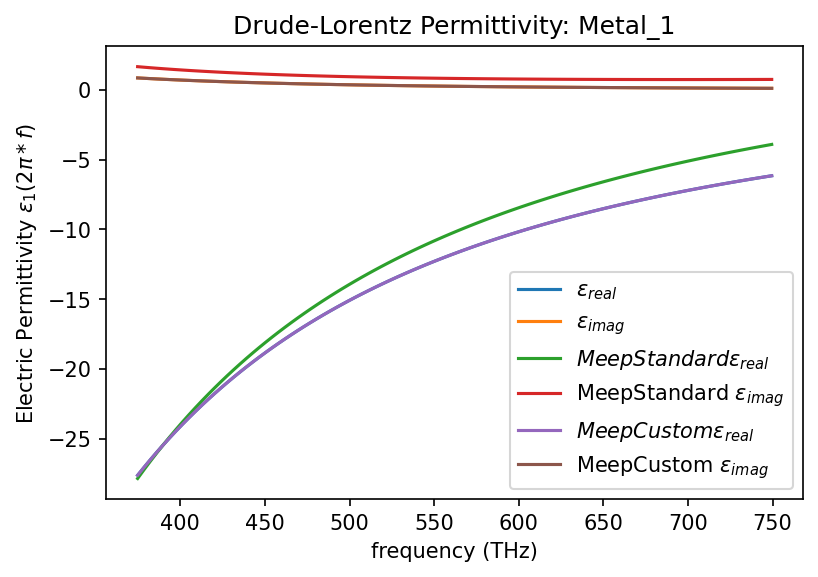

In [12]:
#setting up the material first
import nano_optics_materials.ge_2014 as ge
import nano_optics_materials.models as material_models
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
from meep.materials import Ag_visible as meep_metal
import meep as mp



wp = ge.Metal_1_wp
gamma = ge.Metal_1_gamma




meep_unit_length = constants.micro
meep_unit_time = meep_unit_length/constants.c
meep_unit_frequency = meep_unit_time**-1

frequency_meep = np.linspace(ge.Metal_1_Valid_Freq_Range.min, ge.Metal_1_Valid_Freq_Range.max,100)
frequency_si = frequency_meep*meep_unit_frequency
omega_si = frequency_si*2.0*np.pi

eps_1 = material_models.epsilon_drude_lorentz(omega_si,ge.Metal_1_wp,ge.Metal_1_gamma)
ep_Al_meep = meep_metal.epsilon(frequency_meep)[:,0,0]
ep_Metal_1_meep = ge.Metal_1.epsilon(frequency_meep)[:,0,0]

frequency_THz = frequency_si/constants.tera

fig, ax1 =   plt.subplots(dpi=150)                               

ax1.plot(frequency_THz,np.real(eps_1), label=r'$\epsilon_{real}$')
ax1.plot(frequency_THz,np.imag(eps_1), label=r'$\epsilon_{imag}$')
ax1.plot(frequency_THz,np.real(ep_Al_meep), label=r'$MeepStandard \epsilon_{real}$')
ax1.plot(frequency_THz,np.imag(ep_Al_meep), label=r'MeepStandard $\epsilon_{imag}$')
ax1.plot(frequency_THz,np.real(ep_Metal_1_meep), label=r'$MeepCustom \epsilon_{real}$')
ax1.plot(frequency_THz,np.imag(ep_Metal_1_meep), label=r'MeepCustom $\epsilon_{imag}$')
ax1.set_xlabel( r'frequency (THz)' )
ax1.set_ylabel(r'Electric Permittivity $\epsilon_1(2\pi*f)$')
ax1.set_title('Drude-Lorentz Permittivity: Metal_1')
ax1.legend()
plt.show()

In [3]:

from meep.materials import Ag_visible, Ag_visible_frq0, Ag_visible_frq1
import nano_optics_materials.ge_2014 as ge
import nano_optics_materials.models as material_models



print(Ag_visible.valid_freq_range, Ag_visible_frq0,Ag_visible_frq1)
print(ge.Metal_1.epsilon(1.25))
print(ge.Metal_1.epsilon(2.5))
print(material_models.epsilon_drude_lorentz(2.0*np.pi*3/meep_unit_time,
                                                    ge.Metal_1_wp, ge.Metal_1_gamma))
print(material_models.epsilon_drude_lorentz(2.0*np.pi*1.25/meep_unit_time,
                                                    ge.Metal_1_wp, ge.Metal_1_gamma))                                             

FreqRange(min=1.25, max=2.5) 7.039766692279308 8.643628668925972
[[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]
[[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]
(-3.970851659282575+0.061575368146403936j)
(-27.611211201523997+0.8505967107146173j)


In [10]:
Metal_1.epsilon(1.5)
print(ge.Metal_1_wp_meep/6)
print(ge.Metal_1_gamma_meep/6)

7.004845999161193
0.03891581110645107
